In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [6]:
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [7]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [9]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [11]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
sum(city_data_df["type"]=="Rural")

18

In [16]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [17]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [19]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [22]:
pyber_data_df = pd.merge(ride_data_df,city_data_df,on=["city","city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


In [25]:
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [28]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,Randallchester,2019-02-19 03:52:47,58.55,8004803682564,9,Rural
2252,Randallchester,2019-02-11 05:42:29,25.78,9010611749008,9,Rural
2253,Randallchester,2019-03-25 13:36:46,10.37,3216382725494,9,Rural
2254,Randallchester,2019-04-07 23:42:07,10.79,1615474447641,9,Rural


In [33]:
urban_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [34]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [38]:
urban_driver_count = urban_cities_df.groupby(["city"]).count()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).count()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).count()["driver_count"]

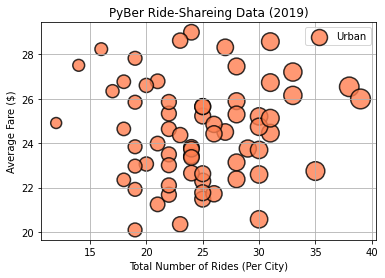

In [54]:
# create a bubble chart
plt.scatter(urban_count, urban_avg_fare, 
            s= 10 * urban_driver_count, c="coral",
           edgecolor="black", linewidths=1.5,
           alpha = 0.8, label = "Urban")
plt.title("PyBer Ride-Shareing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

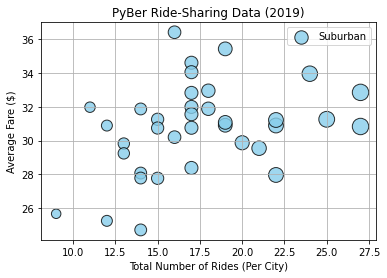

In [53]:
plt.scatter(suburban_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor = "black",linewidths = 1,
            alpha = 0.8, label ="Suburban"
           )
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

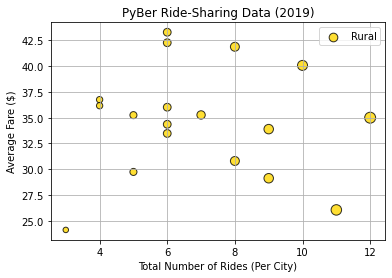

In [55]:
plt.scatter(rural_count,
           rural_avg_fare,
           s= 10 * rural_driver_count, color ="gold",
           edgecolor = "black",linewidths = 1,
           alpha = 0.8,label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

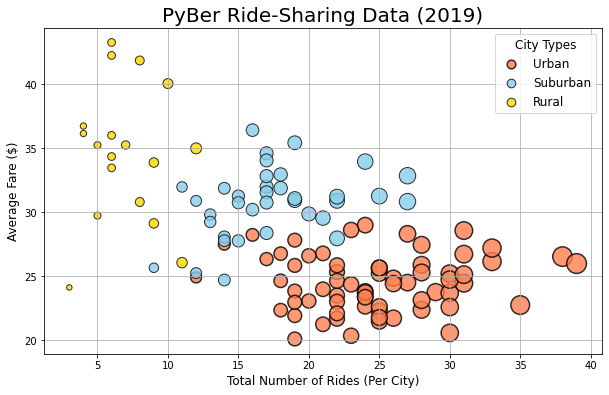

In [61]:
plt.subplots(figsize=(10,6))
plt.scatter(urban_count, urban_avg_fare, 
            s= 10 * urban_driver_count, c="coral",
           edgecolor="black", linewidths=1.5,
           alpha = 0.8, label = "Urban")
plt.scatter(suburban_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor = "black",linewidths = 1,
            alpha = 0.8, label ="Suburban"
           )
plt.scatter(rural_count,
           rural_avg_fare,
           s= 10 * rural_driver_count, color ="gold",
           edgecolor = "black",linewidths = 1,
           alpha = 0.8,label = "Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.grid(True)
plt.savefig("analysis/Fig1.png")
plt.show()